<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

## 1 Comparing the two ‘dialects’

### 1.1 Some nomenclature

- matplotlib has a figure and axis
- to add another axis you can use twinx()

### 1.2 We need some data.

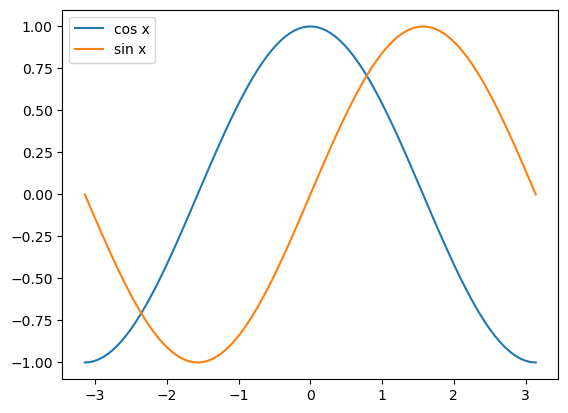

In [4]:
#standard pyplot interface
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()
plt.show()

### 1.3 Here comes the comparison

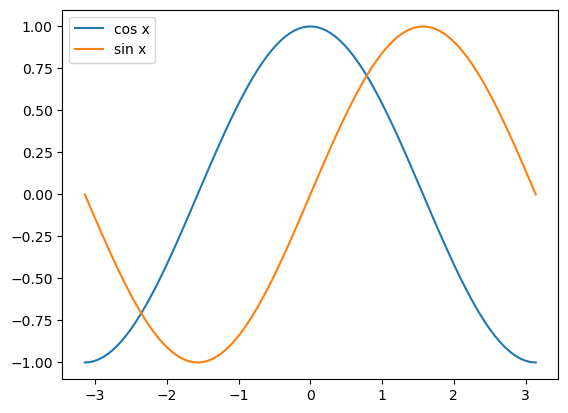

In [6]:
#Objected Oriented Interface
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()
plt.show()

- in OO interface the user has to start by keying in subplots
- then they must key in the figure and axis which can be named wtv
---
- _above code for ref_
- fig, ax = plt.subplots(nrows=1, ncols=1)
- ax.plot(x, cos_x, label='cos x')
- ax.plot(x, sin_x, label='sin x')
- ax.legend()
- plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

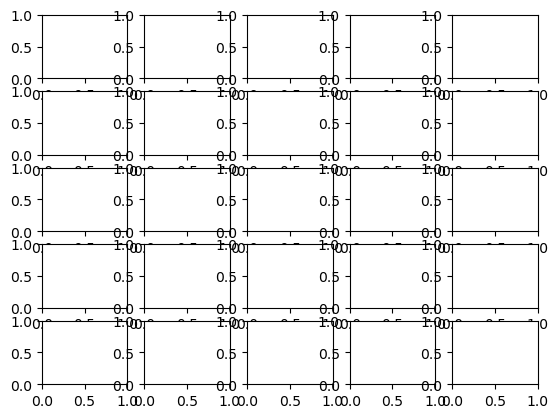

In [8]:
#Objected Oriented Interface
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

fig, ax = plt.subplots(nrows=5, ncols=5)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()
plt.show()

## 2 Using the OO Interface

### 2.1 Getting ax

In [ ]:

# Your code here


### 2.2 What is ax

In [ ]:

# Your code here


### 2.3 Plots in a column

In [ ]:

# Your code here


### 2.4 Legends

In [ ]:

# Your code here


### 2.5 Tweaks

In [ ]:

# Your code here


## 3 More rows and columns

### 3.1 Using ax

In [ ]:

# Your code here


### 3.2 Sharing axes

In [ ]:

# Your code here


### 3.3 Accessing all axes

In [ ]:

# Your code here


## 4 Other useful plots

### 4.1 Histograms

In [ ]:

# Your code here


### 4.2 Scatter plots

In [ ]:

# Your code here


### 4.3 Bar charts

In [ ]:

# Your code here


### 4.4 Pie charts

In [ ]:

# Your code here


## Exercise 1 :  Plotting data from files

In [ ]:



# Your solution here


